In [1]:
! pip uninstall -y -q tensorflow
! pip install -q tensorflow-gpu==2.8.0
! pip install -q deepmatch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 44.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from deepctr.models import *
import deepctr
import csv

In [2]:
recipe_df = pd.read_csv('recipe_without_reviews.csv', low_memory=False)

In [3]:
meal_df = pd.read_csv('meal.csv')
user_recipe_df = pd.read_csv('user_recipe.csv')

In [4]:
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7280 entries, 0 to 7279
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7280 non-null   int64  
 1   recipe_id           7280 non-null   int64  
 2   recipe_name         7280 non-null   object 
 3   review_nums         7280 non-null   int64  
 4   category            7280 non-null   object 
 5   aver_rate           7280 non-null   float64
 6   image_url           7280 non-null   object 
 7   ingredients         7280 non-null   object 
 8   cooking_directions  7280 non-null   object 
 9   nutritions          7280 non-null   object 
 10  tags                7278 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 625.8+ KB


In [5]:
user_recipe_df.recipe_id.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
151143    False
151144    False
151145    False
151146    False
151147    False
Name: recipe_id, Length: 151148, dtype: bool

In [6]:
recipe_df.head()

,Unnamed: 0,recipe_id,recipe_name,review_nums,category,aver_rate,image_url,ingredients,cooking_directions,nutritions,tags
0,0,6698,Mom's Zucchini Bread,9355,appetizer,4.754207,https://images.media-allrecipes.com/userphotos...,all-purpose flour^salt^baking soda^baking powd...,{'directions': u'Prep\n20 m\nCook\n1 h\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...",north-american;breads;easy;beginner-cook;inexp...
1,1,6709,Zucchini Walnut Bread,58,appetizer,4.478873,http://images.media-allrecipes.com/userphotos/...,chopped walnuts^eggs^white sugar^vegetable oil...,"{'directions': u'Whisk together flour, baking ...","{u'niacin': {u'hasCompleteData': True, u'name'...",weeknight;breads;fruit;vegetables;kid-friendly...
2,2,6725,Honey Wheat Bread I,2054,appetizer,4.766846,http://images.media-allrecipes.com/userphotos/...,rapid rise yeast^white sugar^warm water (110 d...,{'directions': u'Prep\n25 m\nCook\n35 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...",healthy;breads;dietary;low-cholesterol;healthy...
3,3,6730,Chocolate Chip Orange Zucchini Bread,503,dessert,4.674833,https://images.media-allrecipes.com/userphotos...,eggs^white sugar^vegetable oil^vanilla extract...,"{'directions': u'Sift together flour, baking p...","{u'niacin': {u'hasCompleteData': True, u'name'...",for-large-groups;healthy;breads;kid-friendly;d...
4,4,6732,Chocolate Chip Pumpkin Bread,866,dessert,4.718112,https://images.media-allrecipes.com/userphotos...,white sugar^pumpkin puree^vegetable oil^water^...,{'directions': u'Prep\n30 m\nCook\n1 h\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...",breads;fall;winter;seasonal;quick-breads;4-hou...


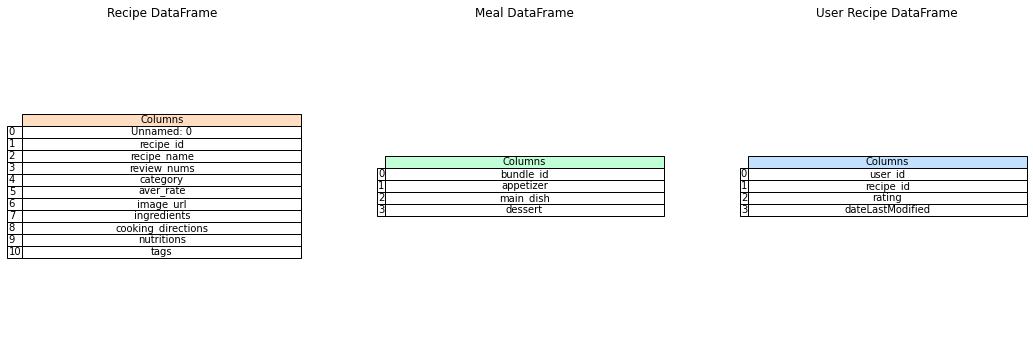

In [7]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas.plotting as pd_plotting
from pandas.plotting import table

recipe_columns = pd.DataFrame({'Columns': recipe_df.columns})
meal_columns = pd.DataFrame({'Columns': meal_df.columns})
user_recipe_columns = pd.DataFrame({'Columns': user_recipe_df.columns})


# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Colors for backgrounds
colors = ['#FFDDC1', '#C1FFD7', '#C1E1FF']

# Recipe DataFrame columns
axes[0].axis('off')
axes[0].set_title('Recipe DataFrame')
table(axes[0], recipe_columns, cellLoc='center', loc='center', colColours=[colors[0]] * 1)

# Meal DataFrame columns
axes[1].axis('off')
axes[1].set_title('Meal DataFrame')
table(axes[1], meal_columns, cellLoc='center', loc='center', colColours=[colors[1]] * 1)

# User Recipe DataFrame columns
axes[2].axis('off')
axes[2].set_title('User Recipe DataFrame')
table(axes[2], user_recipe_columns, cellLoc='center', loc='center', colColours=[colors[2]] * 1)

plt.subplots_adjust(wspace=0.3)
plt.show()


In [8]:
#merging columns
df = user_recipe_df.merge(recipe_df, on='recipe_id')
df.head(4), df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151148 entries, 0 to 151147
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             151148 non-null  int64  
 1   recipe_id           151148 non-null  int64  
 2   rating              151148 non-null  int64  
 3   dateLastModified    151148 non-null  object 
 4   Unnamed: 0          151148 non-null  int64  
 5   recipe_name         151148 non-null  object 
 6   review_nums         151148 non-null  int64  
 7   category            151148 non-null  object 
 8   aver_rate           151148 non-null  float64
 9   image_url           151148 non-null  object 
 10  ingredients         151148 non-null  object 
 11  cooking_directions  151148 non-null  object 
 12  nutritions          151148 non-null  object 
 13  tags                151120 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 17.3+ MB


(   user_id  recipe_id  rating           dateLastModified  Unnamed: 0  \
 0       39      61727       4  2001-03-26T07:36:16.653\n        4262   
 1     8799      61727       5  2004-09-21T06:23:16.427\n        4262   
 2    35974      61727       5  2003-04-19T07:31:14.357\n        4262   
 3    89295      61727       5  2011-09-01T17:50:36.427\n        4262   
 
                   recipe_name  review_nums   category  aver_rate  \
 0  Ten Minute Enchilada Sauce         2443  main-dish   4.439774   
 1  Ten Minute Enchilada Sauce         2443  main-dish   4.439774   
 2  Ten Minute Enchilada Sauce         2443  main-dish   4.439774   
 3  Ten Minute Enchilada Sauce         2443  main-dish   4.439774   
 
                                            image_url  \
 0  https://images.media-allrecipes.com/userphotos...   
 1  https://images.media-allrecipes.com/userphotos...   
 2  https://images.media-allrecipes.com/userphotos...   
 3  https://images.media-allrecipes.com/userphotos...   
 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151148 entries, 0 to 151147
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             151148 non-null  int64  
 1   recipe_id           151148 non-null  int64  
 2   rating              151148 non-null  int64  
 3   dateLastModified    151148 non-null  object 
 4   Unnamed: 0          151148 non-null  int64  
 5   recipe_name         151148 non-null  object 
 6   review_nums         151148 non-null  int64  
 7   category            151148 non-null  object 
 8   aver_rate           151148 non-null  float64
 9   image_url           151148 non-null  object 
 10  ingredients         151148 non-null  object 
 11  cooking_directions  151148 non-null  object 
 12  nutritions          151148 non-null  object 
 13  tags                151120 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 17.3+ MB


In [12]:
df["datetime"] = pd.to_datetime(df['dateLastModified'])
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df.hour.unique()

array([ 7,  6, 17, 19, 15, 16,  8, 23,  4, 10, 18, 13, 11, 12,  2, 20, 22,
        5, 21, 14,  9,  0,  3,  1], dtype=int64)

## Combining nutritions with appropriate data type

In [13]:
df.nutritions[1]

"{u'niacin': {u'hasCompleteData': True, u'name': u'Niacin Equivalents', u'amount': 1.057699, u'percentDailyValue': u'8', u'displayValue': u'1', u'unit': u'mg'}, u'sugars': {u'hasCompleteData': False, u'name': u'Sugars', u'amount': 1.901137, u'percentDailyValue': u'0', u'displayValue': u'1.9', u'unit': u'g'}, u'sodium': {u'hasCompleteData': True, u'name': u'Sodium', u'amount': 408.3739, u'percentDailyValue': u'16', u'displayValue': u'408', u'unit': u'mg'}, u'carbohydrates': {u'hasCompleteData': True, u'name': u'Carbohydrates', u'amount': 7.002383, u'percentDailyValue': u'2', u'displayValue': u'7', u'unit': u'g'}, u'vitaminB6': {u'hasCompleteData': True, u'name': u'Vitamin B6', u'amount': 0.2361635, u'percentDailyValue': u'15', u'displayValue': u'< 1', u'unit': u'mg'}, u'calories': {u'hasCompleteData': True, u'name': u'Calories', u'amount': 116.0103, u'percentDailyValue': u'6', u'displayValue': u'116', u'unit': u'kcal'}, u'thiamin': {u'hasCompleteData': False, u'name': u'Thiamin', u'amou

### Percent Daily Value: This provides information on how much of the daily recommended intake of the nutrient is present in the food.
Hence, considering this value in determining the nutrition containment in the recipes

In [14]:
# converting the complex nutritions info to simple list of nutritions name

import ast

df['nutritions'] = df['nutritions'].apply(lambda x: ast.literal_eval(x))
df['nutritions']

0         {'niacin': {'hasCompleteData': True, 'name': '...
1         {'niacin': {'hasCompleteData': True, 'name': '...
2         {'niacin': {'hasCompleteData': True, 'name': '...
3         {'niacin': {'hasCompleteData': True, 'name': '...
4         {'niacin': {'hasCompleteData': True, 'name': '...
                                ...                        
151143    {'niacin': {'hasCompleteData': False, 'name': ...
151144    {'niacin': {'hasCompleteData': False, 'name': ...
151145    {'niacin': {'hasCompleteData': False, 'name': ...
151146    {'niacin': {'hasCompleteData': False, 'name': ...
151147    {'niacin': {'hasCompleteData': True, 'name': '...
Name: nutritions, Length: 151148, dtype: object

In [15]:
demo_nutrition = df['nutritions'][0]

def convert_percent_daily_value(value):
    if value == '-':
        return 0
    else:
        return int(value)


top_3 = sorted(demo_nutrition.items(), key=lambda x: convert_percent_daily_value(x[1]['percentDailyValue']), reverse=True)[:]
top_3 = [item[0] for item in top_3]

def get_top_3(nutritions):
  top_3 = sorted(demo_nutrition.items(), key=lambda x: convert_percent_daily_value(x[1]['percentDailyValue']), reverse=True)[:30]
  top_3 = [item[0] for item in top_3]
  return top_3

df['nutritions_list'] = df['nutritions'].apply(lambda x:get_top_3(x))
df['nutritions_list']

0         [vitaminA, sodium, fat, vitaminB6, iron, fiber...
1         [vitaminA, sodium, fat, vitaminB6, iron, fiber...
2         [vitaminA, sodium, fat, vitaminB6, iron, fiber...
3         [vitaminA, sodium, fat, vitaminB6, iron, fiber...
4         [vitaminA, sodium, fat, vitaminB6, iron, fiber...
                                ...                        
151143    [vitaminA, sodium, fat, vitaminB6, iron, fiber...
151144    [vitaminA, sodium, fat, vitaminB6, iron, fiber...
151145    [vitaminA, sodium, fat, vitaminB6, iron, fiber...
151146    [vitaminA, sodium, fat, vitaminB6, iron, fiber...
151147    [vitaminA, sodium, fat, vitaminB6, iron, fiber...
Name: nutritions_list, Length: 151148, dtype: object

In [16]:
# all nutrients
all_nutritions = [nutrition for sublist in df['nutritions_list'] for nutrition in sublist]
len(all_nutritions)

3022960

In [18]:
import collections 

nutrition_counts = collections.Counter(all_nutritions)
top_nutritions = nutrition_counts.most_common(50)

unique_nutritions = [nutrition[0] for nutrition in top_nutritions]

nutrition_frequencies = [nutrition[1] for nutrition in top_nutritions]
len( unique_nutritions)

20

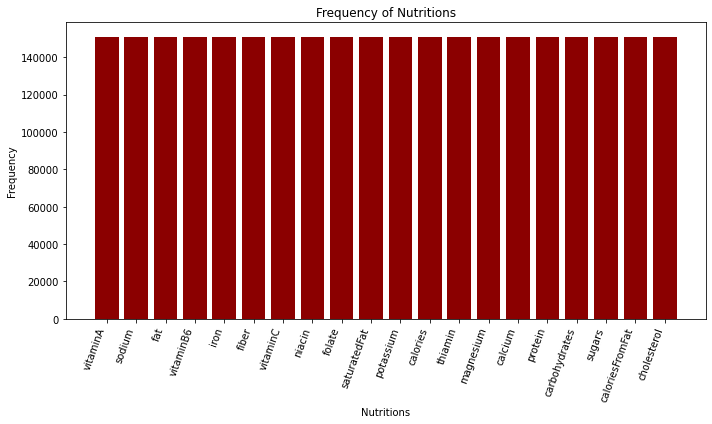

In [19]:
# visualizing the tags distribution in the recipes dataframe
plt.figure(figsize=(10,6))
plt.bar(unique_nutritions, nutrition_frequencies, color='darkred')
plt.xlabel('Nutritions')
plt.ylabel('Frequency')
plt.title('Frequency of Nutritions')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

## Since all nutritions are similar in all recipes, nutritions do not play any role in recommendation

## Appending the tags of each recipes in appropriate format

In [23]:
type( df['tags'][0])

str

In [24]:
df['tags_list'] = df['tags'].apply(lambda x:str(x).split(';'))
df['tags_list']

0         [15-minutes-or-less, north-american, sauces, c...
1         [15-minutes-or-less, north-american, sauces, c...
2         [15-minutes-or-less, north-american, sauces, c...
3         [15-minutes-or-less, north-american, sauces, c...
4         [15-minutes-or-less, north-american, sauces, c...
                                ...                        
151143    [60-minutes-or-less, healthy, main-dish, veget...
151144    [30-minutes-or-less, main-dish, poultry, rice,...
151145    [main-dish, poultry, oven, refrigerator, dinne...
151146    [30-minutes-or-less, appetizers, lunch, vegeta...
151147    [weeknight, for-large-groups, desserts, easy, ...
Name: tags_list, Length: 151148, dtype: object

In [25]:
# getting all tags
all_tags = [tag for sublist in df['tags_list'] for tag in sublist]
len(all_tags)

1929289

In [26]:
# getting tag counts
import collections
tag_counts = collections.Counter(all_tags)
# tag_counts -> returns 'stir-fry': 141,
#          'new-zealand': 5,
#          'tomatoes': 15,

In [27]:
top_tags = tag_counts.most_common(50)

unique_tags = [tag[0] for tag in top_tags]

tag_frequencies = [tag[1] for tag in top_tags]
len( unique_tags)

50

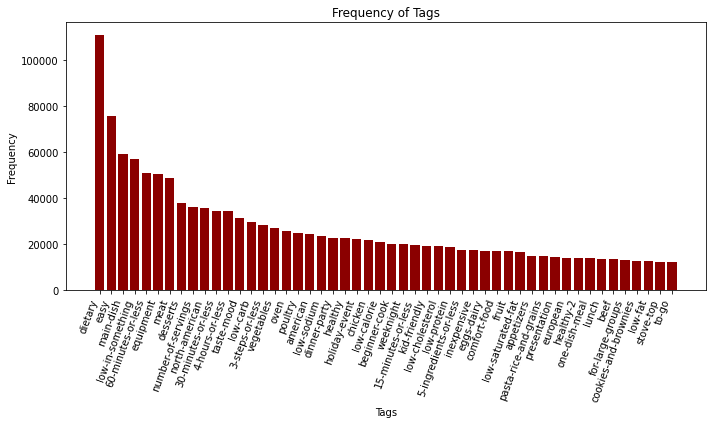

In [28]:
# visualizing the tags distribution in the recipes dataframe
plt.figure(figsize=(10,6))
plt.bar(unique_tags, tag_frequencies, color='darkred')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Frequency of Tags')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

## Evaluating the diversity in cooking preparation

In [29]:
df['cooking_directions'][0]

"{'directions': u'Prep\\n10 m\\nCook\\n15 m\\nReady In\\n25 m\\nHeat oil in a skillet over medium-high heat. Stir in flour and chili powder, reduce heat to medium, and cook until lightly brown, stirring constantly to prevent burning flour.\\nGradually stir in tomato sauce, water, cumin, garlic powder, and onion salt into the flour and chili powder until smooth, and continue cooking over medium heat approximately 10 minutes, or until thickened slightly. Season to taste with salt.'}"

In [30]:
from nltk import pos_tag
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OMEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\OMEN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
def give_keywords(cooking_direction):

  tokens = word_tokenize(cooking_direction.lower())

  pos_tags = pos_tag(tokens)
  stop_words = set(stopwords.words('english'))

  selected_pos_tags = ['NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ']
  filtered_words = [word for word, pos_tag in pos_tags if word.isalnum() and word not in stop_words and pos_tag in selected_pos_tags]
  word_freq = Counter(filtered_words)

  # Select top keywords (e.g., top 5)
  top_keywords = word_freq.most_common(10)
  return [word for word, _ in top_keywords]

In [32]:
give_keywords(df['cooking_directions'][2]), give_keywords(df['cooking_directions'][500])

(['heat',
  'powder',
  'stir',
  'flour',
  'chili',
  'medium',
  'salt',
  'oil',
  'skillet',
  'reduce'],
 ['baking',
  'oven',
  'degrees',
  'sugar',
  'minutes',
  'cool',
  'f',
  'c',
  'large',
  'bowl'])

In [34]:
df['cooking_words'] = df['cooking_directions'].apply(lambda x:give_keywords(x))
df['cooking_words']

0         [heat, powder, stir, flour, chili, medium, sal...
1         [heat, powder, stir, flour, chili, medium, sal...
2         [heat, powder, stir, flour, chili, medium, sal...
3         [heat, powder, stir, flour, chili, medium, sal...
4         [heat, powder, stir, flour, chili, medium, sal...
                                ...                        
151143    [cover, minutes, peppers, dish, aluminum, quin...
151144    [min, heat, add, cook, stir, boil, cheese, spi...
151145    [chicken, desired, knorr, r, heat, skillet, sa...
151146    [spinach, stir, powder, olive, oil, skillet, m...
151147    [medium, heat, boil, inch, h, saucepan, combin...
Name: cooking_words, Length: 151148, dtype: object

In [35]:
all_cooking_words = [cooking_word for sublist in df['cooking_words'] for cooking_word in sublist]
print(len(all_cooking_words))

cooking_word_counts = collections.Counter(all_cooking_words)

top_cooking_words = cooking_word_counts.most_common(50)

unique_cooking_words = [cooking_word[0] for cooking_word in top_cooking_words]

cooking_word_frequencies = [cooking_word[1] for cooking_word in top_cooking_words]
len( unique_cooking_words)

1510005


50

In [36]:
# most common words in cooking directions

most_common_cooking_words = [word for word, _ in cooking_word_counts.most_common(10)]

In [37]:
# again, but deducing the most common words

def give_keywords(cooking_direction, discard_words = most_common_cooking_words):

  tokens = word_tokenize(cooking_direction.lower())

  pos_tags = pos_tag(tokens)
  stop_words = set(stopwords.words('english'))

  selected_pos_tags = ['NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ']
  filtered_words = [word for word, pos_tag in pos_tags if word.isalnum() and word not in stop_words and pos_tag in selected_pos_tags]

  filtered_words = [word for word in filtered_words if word not in discard_words]

  word_freq = Counter(filtered_words)

  # Select top keywords (e.g., top 5)
  top_keywords = word_freq.most_common(50)
  return [word for word, _ in top_keywords]

In [38]:
give_keywords(df['cooking_directions'][2], most_common_cooking_words), give_keywords(df['cooking_directions'][500], most_common_cooking_words)

(['powder',
  'flour',
  'chili',
  'salt',
  'oil',
  'skillet',
  'reduce',
  'cook',
  'brown',
  'stirring',
  'prevent',
  'burning',
  'tomato',
  'sauce',
  'water',
  'cumin',
  'garlic',
  'onion',
  'smooth',
  'continue',
  'cooking',
  'thickened',
  'season',
  'taste'],
 ['baking',
  'sugar',
  'cool',
  'c',
  'cream',
  'butter',
  'brown',
  'white',
  'smooth',
  'beat',
  'eggs',
  'time',
  'vanilla',
  'combine',
  'flour',
  'soda',
  'salt',
  'creamed',
  'mixture',
  'blended',
  'mix',
  'quick',
  'oats',
  'walnuts',
  'chocolate',
  'chips',
  'drop',
  'heaping',
  'spoonfuls',
  'ungreased',
  'preheated',
  'allow',
  'cookies',
  'sheet',
  'transferring',
  'wire',
  'rack'])

In [39]:
df['cooking_words'] = df['cooking_directions'].apply(lambda x:give_keywords(x))
df['cooking_words']

0         [powder, flour, chili, salt, oil, skillet, red...
1         [powder, flour, chili, salt, oil, skillet, red...
2         [powder, flour, chili, salt, oil, skillet, red...
3         [powder, flour, chili, salt, oil, skillet, red...
4         [powder, flour, chili, salt, oil, skillet, red...
                                ...                        
151143    [cover, peppers, dish, aluminum, quinoa, mixtu...
151144    [min, add, cook, boil, cheese, spinach, pan, c...
151145    [chicken, desired, knorr, r, skillet, salt, pe...
151146    [spinach, powder, olive, oil, skillet, cook, w...
151147    [boil, inch, saucepan, combine, corn, syrup, p...
Name: cooking_words, Length: 151148, dtype: object

In [40]:
all_cooking_words = [cooking_word for sublist in df['cooking_words'] for cooking_word in sublist]
print(len(all_cooking_words))

cooking_word_counts = collections.Counter(all_cooking_words)

top_cooking_words = cooking_word_counts.most_common(30)

unique_cooking_words = [cooking_word[0] for cooking_word in top_cooking_words]

cooking_word_frequencies = [cooking_word[1] for cooking_word in top_cooking_words]
len( unique_cooking_words)

4958343


30

In [41]:
cooking_word_counts.most_common(10)[::-1]

[('preheated', 47762),
 ('add', 49936),
 ('baking', 52235),
 ('pepper', 53782),
 ('cook', 57507),
 ('butter', 58258),
 ('sugar', 60255),
 ('mix', 63348),
 ('mixture', 67605),
 ('salt', 79470)]

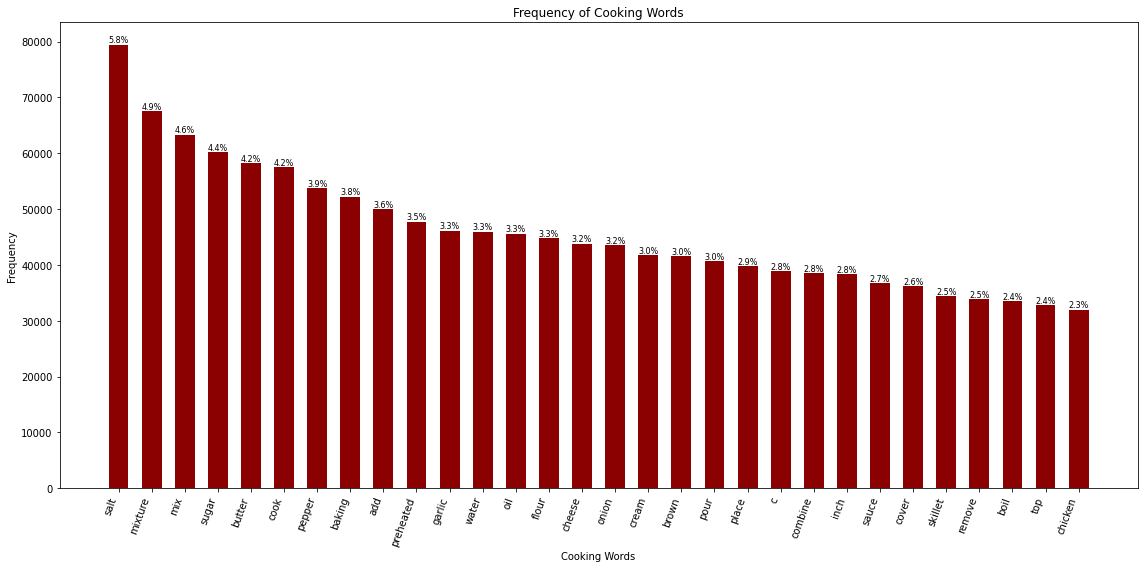

In [42]:
# Calculate total number of words
total_words = sum(cooking_word_frequencies)

# Calculate percentage of total words for each word
word_percentages = [(freq / total_words) * 100 for freq in cooking_word_frequencies]

# Plot
plt.figure(figsize=(16, 8))
bars = plt.bar(unique_cooking_words, cooking_word_frequencies, color='darkred', width=0.6)

for bar, percentage in zip(bars, word_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{percentage:.1f}%',
             ha='center', va='bottom', color='black', fontsize=8)

plt.xlabel('Cooking Words')
plt.ylabel('Frequency')
plt.title('Frequency of Cooking Words')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

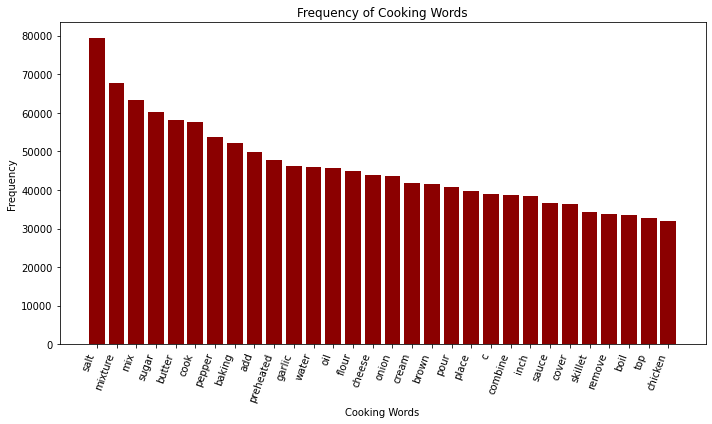

In [43]:
plt.figure(figsize=(10,6))
plt.bar(unique_cooking_words, cooking_word_frequencies, color='darkred')
plt.xlabel('Cooking Words')
plt.ylabel('Frequency')
plt.title('Frequency of Cooking Words')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

## Preprocessing the ingredients column

In [44]:
df['ingredients'][0]

'vegetable oil^self-rising flour^New Mexico^tomato sauce^water^ground cumin^garlic powder^onion salt^salt to taste'

## Getting final df for construction of model

In [45]:
def preprocess_(row_list):
  """
  Returns the elements of list separated by '|'
  """
  temp =  '|'.join([item.strip() for item in row_list])
  return temp.replace(' ', '')

In [46]:
df[['cooking_words']] = df[['cooking_words']].applymap(preprocess_)
df[['cooking_words']]

,cooking_words
0,powder|flour|chili|salt|oil|skillet|reduce|coo...
1,powder|flour|chili|salt|oil|skillet|reduce|coo...
2,powder|flour|chili|salt|oil|skillet|reduce|coo...
3,powder|flour|chili|salt|oil|skillet|reduce|coo...
4,powder|flour|chili|salt|oil|skillet|reduce|coo...
...,...
151143,cover|peppers|dish|aluminum|quinoa|mixture|bak...
151144,min|add|cook|boil|cheese|spinach|pan|covered|d...
151145,chicken|desired|knorr|r|skillet|salt|pepper|fl...
151146,spinach|powder|olive|oil|skillet|cook|wilted|c...


In [47]:
df['ingredients_list'] = df['ingredients'].apply(lambda x:x.split('^'))

all_ingredients_words = [ingredients_word for sublist in df['ingredients_list'] for ingredients_word in sublist]
print(len(all_ingredients_words))

ingredients_word_counts = collections.Counter(all_ingredients_words)

top_ingredients_words = ingredients_word_counts.most_common(50)

unique_ingredients_words = [ingredients_word[0] for ingredients_word in top_ingredients_words]

ingredients_word_frequencies = [ingredients_word[1] for ingredients_word in top_ingredients_words]
len( unique_ingredients_words)


1390612


50

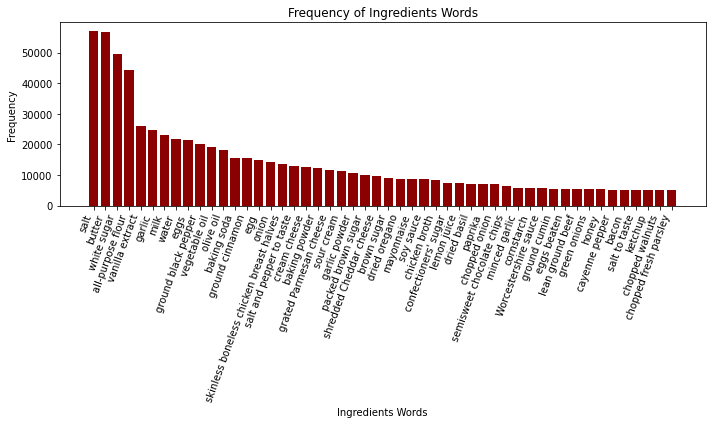

In [48]:
plt.figure(figsize=(10,6))
plt.bar(unique_ingredients_words, ingredients_word_frequencies, color='darkred')
plt.xlabel('Ingredients Words')
plt.ylabel('Frequency')
plt.title('Frequency of Ingredients Words')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

In [49]:
df[['ingredients_list']] = df[['ingredients_list']].applymap(preprocess_)
df[['tags_list']] = df[['tags_list']].applymap(preprocess_)
df[['ingredients_list']], df[['tags_list']]

(                                         ingredients_list
 0       vegetableoil|self-risingflour|NewMexico|tomato...
 1       vegetableoil|self-risingflour|NewMexico|tomato...
 2       vegetableoil|self-risingflour|NewMexico|tomato...
 3       vegetableoil|self-risingflour|NewMexico|tomato...
 4       vegetableoil|self-risingflour|NewMexico|tomato...
 ...                                                   ...
 151143  quinoarinsedanddrained|water|oliveoil|smalloni...
 151144  KRAFTRoastedRedPepperItalianwithParmesanDressi...
 151145  bonelessskinlesschickenbreasts|vegetableoil|li...
 151146  oliveoil|bagfreshspinach|artichokeheartsdraine...
 151147  cornsyrup|peanutbutter|semisweetchocolatechips...
 
 [151148 rows x 1 columns],
                                                 tags_list
 0       15-minutes-or-less|north-american|sauces|condi...
 1       15-minutes-or-less|north-american|sauces|condi...
 2       15-minutes-or-less|north-american|sauces|condi...
 3       15-minutes-or-les

In [51]:
df['cooking_words']

0         powder|flour|chili|salt|oil|skillet|reduce|coo...
1         powder|flour|chili|salt|oil|skillet|reduce|coo...
2         powder|flour|chili|salt|oil|skillet|reduce|coo...
3         powder|flour|chili|salt|oil|skillet|reduce|coo...
4         powder|flour|chili|salt|oil|skillet|reduce|coo...
                                ...                        
151143    cover|peppers|dish|aluminum|quinoa|mixture|bak...
151144    min|add|cook|boil|cheese|spinach|pan|covered|d...
151145    chicken|desired|knorr|r|skillet|salt|pepper|fl...
151146    spinach|powder|olive|oil|skillet|cook|wilted|c...
151147    boil|inch|saucepan|combine|corn|syrup|peanut|b...
Name: cooking_words, Length: 151148, dtype: object

In [183]:
# df[['tags_list']] = df[['tags_list']].applymap(preprocess_)

# df[['cooking_words']] = df[['cooking_words']].applymap(preprocess_)

# df[['tags']].applymap(lambda x:preprocess(x.split(';')))

In [52]:
df.columns

Index(['user_id', 'recipe_id', 'rating', 'dateLastModified', 'Unnamed: 0',
       'recipe_name', 'review_nums', 'category', 'aver_rate', 'image_url',
       'ingredients', 'cooking_directions', 'nutritions', 'tags', 'datetime',
       'year', 'month', 'day', 'hour', 'nutritions_list', 'tags_list',
       'cooking_words', 'ingredients_list'],
      dtype='object')

In [53]:
df[['ingredients_list', 'cooking_words', 'tags_list']]

,ingredients_list,cooking_words,tags_list
0,vegetableoil|self-risingflour|NewMexico|tomato...,powder|flour|chili|salt|oil|skillet|reduce|coo...,15-minutes-or-less|north-american|sauces|condi...
1,vegetableoil|self-risingflour|NewMexico|tomato...,powder|flour|chili|salt|oil|skillet|reduce|coo...,15-minutes-or-less|north-american|sauces|condi...
2,vegetableoil|self-risingflour|NewMexico|tomato...,powder|flour|chili|salt|oil|skillet|reduce|coo...,15-minutes-or-less|north-american|sauces|condi...
3,vegetableoil|self-risingflour|NewMexico|tomato...,powder|flour|chili|salt|oil|skillet|reduce|coo...,15-minutes-or-less|north-american|sauces|condi...
4,vegetableoil|self-risingflour|NewMexico|tomato...,powder|flour|chili|salt|oil|skillet|reduce|coo...,15-minutes-or-less|north-american|sauces|condi...
...,...,...,...
151143,quinoarinsedanddrained|water|oliveoil|smalloni...,cover|peppers|dish|aluminum|quinoa|mixture|bak...,60-minutes-or-less|healthy|main-dish|vegetable...
151144,KRAFTRoastedRedPepperItalianwithParmesanDressi...,min|add|cook|boil|cheese|spinach|pan|covered|d...,30-minutes-or-less|main-dish|poultry|rice|vege...
151145,bonelessskinlesschickenbreasts|vegetableoil|li...,chicken|desired|knorr|r|skillet|salt|pepper|fl...,main-dish|poultry|oven|refrigerator|dinner-par...
151146,oliveoil|bagfreshspinach|artichokeheartsdraine...,spinach|powder|olive|oil|skillet|cook|wilted|c...,30-minutes-or-less|appetizers|lunch|vegetables...


In [54]:
final_df = df[['user_id', 'rating', 'recipe_id','recipe_name', 'tags_list', 'cooking_words', 'review_nums', 'aver_rate', 'category', 'year', 'month', 'day', 'hour']]
final_df.head(2)

,user_id,rating,recipe_id,recipe_name,tags_list,cooking_words,review_nums,aver_rate,category,year,month,day,hour
0,39,4,61727,Ten Minute Enchilada Sauce,15-minutes-or-less|north-american|sauces|condi...,powder|flour|chili|salt|oil|skillet|reduce|coo...,2443,4.439774,main-dish,2001,3,26,7
1,8799,5,61727,Ten Minute Enchilada Sauce,15-minutes-or-less|north-american|sauces|condi...,powder|flour|chili|salt|oil|skillet|reduce|coo...,2443,4.439774,main-dish,2004,9,21,6


In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151148 entries, 0 to 151147
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        151148 non-null  int64  
 1   rating         151148 non-null  int64  
 2   recipe_id      151148 non-null  int64  
 3   recipe_name    151148 non-null  object 
 4   tags_list      151148 non-null  object 
 5   cooking_words  151148 non-null  object 
 6   review_nums    151148 non-null  int64  
 7   aver_rate      151148 non-null  float64
 8   category       151148 non-null  object 
 9   year           151148 non-null  int64  
 10  month          151148 non-null  int64  
 11  day            151148 non-null  int64  
 12  hour           151148 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 20.2+ MB


In [56]:
final_df.to_csv('final_dataframe2.csv')